# Using the DLA module

Hi Abby, 

This notebook is designed to give you a sense of what is possible to do with the DLA module, as it stands now. There is also further documention in the `DLA.py` file. Each cell is intended to show of a single feature of the module and I've provided some background in comments. A final note: you must have the `DLA.py` file in the same directory as this notebook for this to work. I've packaged both as a zip file for this reason, but if you're unable to run the first cell let me know as soon as you can.

As always let me know if you have any questions.

Peter

In [1]:
from DLA import DLAnalyzer # how to import the module, let me know if this doesn't work
import pandas as pd

demo_dass = pd.read_csv('Demo_DASS.csv') # read the data file with pandas
demo_dass.head()

,Abby_Project_ID,age,gender,gender_text,ethnicitylatino,race,USA,state,city,zipcode,...,SES_country,education,degree,degree_text,ID,Narrative,DASS.Total,DASS.Stress,DASS.Anxiety,DASS.Depression
0,covid19_survey_final_HF_2,33.0,Male,NaN,No,White/Caucasian,Yes,Kentucky,lebaon,40033.0,...,2.0,College - 14,High school diploma or equivalency (GED),NaN,1,I work at a big retailer and it was hectic and...,22,6,2,14
1,covid19_survey_final_HF_3,33.0,Female,NaN,No,White/Caucasian,Yes,Michigan,Ypsilanti,48197.0,...,4.0,College - 14,Associate degree (junior college),NaN,2,I already worked from home and I'm an introver...,2,0,0,2
2,covid19_survey_final_HF_4,30.0,Male,NaN,No,White/Caucasian,Yes,Florida,Jacksonville,32223.0,...,6.0,College - 16,Bachelor's degree,NaN,3,"I'm constantly tired, frustrated, and bored. I...",62,22,8,32
3,covid19_survey_final_HF_5,48.0,Male,NaN,No,White/Caucasian,Yes,Ohio,Willoughby Hills,44092.0,...,7.0,College - 14,High school diploma or equivalency (GED),NaN,4,For the most part we have been lucky. I work ...,8,6,0,2
4,covid19_survey_final_HF_6,52.0,Female,NaN,No,White/Caucasian,Yes,Nevada,Las Vegas,89109.0,...,6.0,Graduate School - 18,Master's degree,NaN,5,I'm concerned of course that myself or my exte...,4,4,0,0


In [2]:
dla = DLAnalyzer(demo_dass, remove_stops=True,  name='full_dataset') # instantiate a DLA object
dla

In [3]:
# this command runs the ngram to outcome correlation 
# takes ~9 minutes
dla.dla()

Generating group norms
Getting outcomes
Correlating text to outcomes


100%|██████████| 80982/80982 [03:39<00:00, 368.17it/s]


0        (-0.02899215237641538, 0.32658085606845655, 11...
1        (0.05363436257332325, 0.0694037799244624, 1147...
2        (0.023397227095929972, 0.4285663278883705, 114...
3        (-0.028694367446074714, 0.3315763601909693, 11...
4        (-0.043747656403737005, 0.13868325202172158, 1...
                               ...                        
80977    (0.014082201750413352, 0.6337673510178482, 114...
80978    (-0.010621621871310313, 0.7193373855268379, 11...
80979    (0.014781448828315653, 0.6170113184089586, 114...
80980    (-0.010621621871310313, 0.7193373855268379, 11...
80981    (-0.010621621871310313, 0.7193373855268379, 11...
Name: feat, Length: 80982, dtype: object

In [4]:
# save the output of above as a CSV
dla.save_correls('correls_8252023.csv')

In [6]:
# loads a CSV of correls from a file path
# this is useful so you don't have to wait for the dla.dla()
dla.load_correls(path='correls_8252023.csv')
dla.correls

0         (0.0312079104302045, 0.2909521225314494, 1147,...
1         (-0.0284992399250087, 0.334876343146662, 1147,...
2         (-0.0234951040394681, 0.4266368046766304, 1147...
3         (-0.0307207637372305, 0.2985522872567471, 1147...
4         (0.0494634911002956, 0.0940524671314669, 1147,...
                                ...                        
125624    (0.0148053467351021, 0.6164420923023093, 1147,...
125625    (-0.0106216218713103, 0.7193373855268379, 1147...
125626    (0.0194262286776072, 0.5110135606613465, 1147,...
125627    (-0.0106216218713103, 0.7193373855268379, 1147...
125628    (-0.0106216218713103, 0.7193373855268379, 1147...
Name: feat, Length: 125629, dtype: object

In [7]:
# can save raw freqency table
dla.save_freq('freq_8252023.csv')
freq = pd.read_csv('freq_8252023.csv')
freq

,feature,frequency
0,i,7304
1,work,715
2,at,859
3,a,2985
4,big,62
...,...,...
29493,commute and interact,1
29494,pandemic i lost,1
29495,started a position,1
29496,having a position,1


In [8]:
# gives the positive and negative correlation words
pos, neg = dla.apply_threshold(return_words=True)
pos[:10], neg[:10]

([('poor', 0.108705512497866),
  ('multiple times', 0.1039568576394756),
  ('response', 0.0979009122896848),
  ('old son', 0.0970007182262675),
  ('daily routine', 0.096538743639493),
  ('nowadays', 0.0961759455117783),
  ('terrified', 0.0933210228489053),
  ('making it harder', 0.0913694898511522),
  ('strength', 0.0913082245986019),
  ('2018', 0.0911584113387704)],
 [('by', -0.0583260751390453),
  ('remote work', -0.0583711723833995),
  ('support system', -0.0585858729094428),
  ('lots of people', -0.0593054808962522),
  ('want', -0.0593589291847701),
  ('stay', -0.0601925029712608),
  ('some', -0.0621078239012387),
  ('time at home', -0.0623297855656941),
  ('computer', -0.0624452604172081),
  ('hopefully', -0.0624803010706666)])

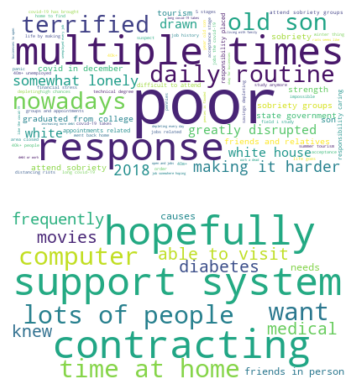

In [5]:
dla.generate_word_clouds() # creates word clouds
# you can also save the image with
# dla.generate_word_clouds(path='path/to/directory')
# dla.generate_word_clouds(path='path/to/directory', use_name=True) add the name ofthe DLA object to the file name

In [9]:
# you can find all of the narratives that include a specific word with this function
# use the drop down to see other narratives
dla.search('daily routine', nb=True)

In [10]:
dla.regress(kfold=10)

Mean squared error: 609.5967794261511
Mean squared error: 753.4016799436478
Mean squared error: 676.4077558042025
Mean squared error: 845.8760748854584
Mean squared error: 721.4449787657982
Mean squared error: 664.3695771609638
Mean squared error: 797.6990816804365
Mean squared error: 641.0626248917478
Mean squared error: 637.860302855024
Mean squared error: 571.3002273071452


RidgeCV(alphas=array([1.e+03, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+04, 1.e+05]))

In [11]:
dla.rcv.alpha_

10.0

In [12]:
# r-squared, r
dla.regscore, dla.regscore**(1/2)

(0.16168071474704526, 0.40209540503100166)

In [13]:
# using FlagEmbedding
dla.regress(emb_model='BAAI/bge-large-en', kfold=10)

Mean squared error: 579.2120242927018
Mean squared error: 723.3742883712144
Mean squared error: 652.3036513960967
Mean squared error: 762.1580132673382
Mean squared error: 680.1708198750223
Mean squared error: 611.6893119446405
Mean squared error: 746.6650898437686
Mean squared error: 715.1719748011758
Mean squared error: 653.8948562478902
Mean squared error: 603.3576734519323


RidgeCV(alphas=array([1.e+03, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+04, 1.e+05]))

In [14]:
# r-squared, r
dla.regscore, dla.regscore**(1/2) # wow is this legit?

(0.3679941146284482, 0.6066251846308791)